# Car Prices Dataset Keşifsel Veri Analizi (EDA) Ve Makine Öğrenmesi (ML)

### Veri Seti Hakkında

<p>"Taşıt Satışları ve Pazar Trendleri Veri Seti", çeşitli araçların satış işlemlerine ilişkin kapsamlı bir bilgi koleksiyonunu sağlar. Bu veri seti, yıl, marka, model, trim, gövde tipi, şanzıman tipi, VIN (Araç Tanımlama Numarası), kayıt durumu, koşul derecesi, kilometre okuması, dış ve iç renkler, satıcı bilgileri, Manheim Pazar Raporu (MMR) değerleri, satış fiyatları ve satış tarihleri gibi detayları içerir.</p><br>

<div style="display: flex;">
    <img src="jpg/Car.jpg" alt="Car" style="width:450px;height:200px; margin-left: 10px;">
</div>

Ana Özellikler:
Araç Detayları: Her araçla ilgili özel bilgileri içerir, marka, model, trim ve imalat yılı gibi.

İşlem Bilgileri: Satış işlemlerine dair içgörüler sağlar, satış fiyatları ve satış tarihlerini içerir.

Pazar Trendleri: MMR değerleri, her aracın piyasa değerinin bir tahminini sunar, pazar trendlerini ve dalgalanmalarını analiz etmeyi sağlar.

Durum ve Kilometre: Araçların durumu ile ilgili verileri ve kilometre okumalarını içerir, bu faktörlerin satış fiyatlarını nasıl etkilediğini analiz etmeyi sağlar.

<div style="color:navy;">
    <h5>Kütüphanelerin İmport Edilmesi ve Veri Setinin Yüklenmesi</h5>
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("car_prices.csv")

In [3]:
df.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)




<div style="color:navy;">
    <h5>Veri Setinin Temel Yapısı Hakkında Bilgi Edinilmesi</h5>
</div>

In [4]:
# 558837 Satır - 16 Sütun
df.shape

(558837, 16)

In [5]:
# 558837 Entries
# Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [6]:
# İstatistiksel Bilgiler 
# T = Transpozunu almamızı sağlar
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,558837.0,2010.038927,3.966864,1982.0,2007.0,2012.0,2013.0,2015.0
condition,547017.0,30.672365,13.402832,1.0,23.0,35.0,42.0,49.0
odometer,558743.0,68320.017767,53398.542821,1.0,28371.0,52254.0,99109.0,999999.0
mmr,558799.0,13769.377495,9679.967174,25.0,7100.0,12250.0,18300.0,182000.0
sellingprice,558825.0,13611.358810,9749.501628,1.0,6900.0,12100.0,18200.0,230000.0


In [7]:
# Unique Değer Sayıları
df.nunique()

year                34
make                96
model              973
trim              1963
body                87
transmission         4
vin             550297
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64



<div style="color:navy;">
    <h5>Data Preprocessing İşlemleri</h5>
</div>

In [8]:
# Missing Values
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [9]:
# Veri Tipleri'nin Öğrenilmesi
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [10]:
# EDA Öncesi Gereksiz Olan Bu Sütunu Sil
df.drop("vin", axis = 1, inplace=True)

In [11]:
# EDA Öncesi Missing Values'ların oldurulması
# condition, odometer, mmr, sellingprice Gibi Collumnlarda Bulunan Missing Valuesların Mean Değerleriyle Doldurulması
df["condition"].fillna(df["condition"].mean(),inplace=True)
df["odometer"].fillna(df["odometer"].mean(),inplace=True)
df["mmr"].fillna(df["mmr"].mean(),inplace=True)
df["sellingprice"].fillna(df["sellingprice"].mean(),inplace=True)

In [12]:
# Check-1
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
state               0
condition           0
odometer            0
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate           12
dtype: int64

In [13]:
# EDA Öncesi Missing Values'ların Doldurulması
# color, saledate, interior, transmission, body, trim Gibi Değerler İçin mean Değeri Kullanamayız (Anlamsız Olur.) 
# En Çok Tekrar Edeni Yani "Mod" Değerini Kullanırız.
df["color"].fillna(df["color"].mode()[0],inplace=True)
df["saledate"].fillna(df["saledate"].mode()[0],inplace=True)
df["interior"].fillna(df["interior"].mode()[0],inplace=True)
df["transmission"].fillna(df["transmission"].mode()[0],inplace=True)
df["body"].fillna(df["body"].mode()[0],inplace=True)
df["trim"].fillna(df["trim"].mode()[0],inplace=True)

In [14]:
# Check-2
df.isna().sum()

year                0
make            10301
model           10399
trim                0
body                0
transmission        0
state               0
condition           0
odometer            0
color               0
interior            0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [15]:
# make = 10301 missing values
# model = 10399 missing values
df["make"].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

In [16]:
df["model"].unique()

array(['Sorento', '3 Series', 'S60', '6 Series Gran Coupe', 'Altima',
       'M5', 'Cruze', 'A4', 'Camaro', 'A6', 'Optima', 'Fusion', 'Sonata',
       'Q5', '6 Series', 'Impala', '5 Series', 'A3', 'XC70', 'X5', 'SQ5',
       'S5', 'Verano', 'Suburban', 'ELR', 'V60', 'X6', 'ILX', 'K900',
       'Malibu', 'RX 350', 'Versa', 'Elantra', 'Versa Note', 'A8', 'X1',
       nan, 'Enclave', 'TTS', '4 Series', 'Silverado 2500HD', 'MDX',
       'Silverado 1500', 'SRX', 'G Coupe', 'G Sedan', 'FX', 'Santa Fe',
       'Genesis', 'Equus', 'Sonata Hybrid', 'Accent', 'Veloster',
       'Elantra Coupe', 'Azera', 'Tucson', 'Genesis Coupe', 'Wrangler',
       'S-Class', 'GS 350', 'Outlander', 'C-Class', 'Mazda2', 'Rio', 'M',
       '370Z', 'Soul', 'Outlander Sport', 'SLK-Class', 'ES 350',
       'E-Class', 'Mazda3', 'Cooper Clubman', 'Cooper', 'CX-9', 'Forte',
       'Compass', 'JX', 'RX 450h', 'LR4', 'Mazda5', 'Range Rover Evoque',
       'LS 460', 'GLK-Class', 'Sportage', 'Grand Cherokee', 'MKX', 'mkt',




<div style="color:navy;">
    <h5>Some Plot's</h5>
</div>

In [17]:
# En Çok Satılan Araç Markaları
most = df.groupby("make")["year"].count().nlargest(10)
most

make
Ford         93554
Chevrolet    60197
Nissan       53946
Toyota       39871
Dodge        30710
Honda        27206
Hyundai      21816
BMW          20719
Kia          18077
Chrysler     17276
Name: year, dtype: int64

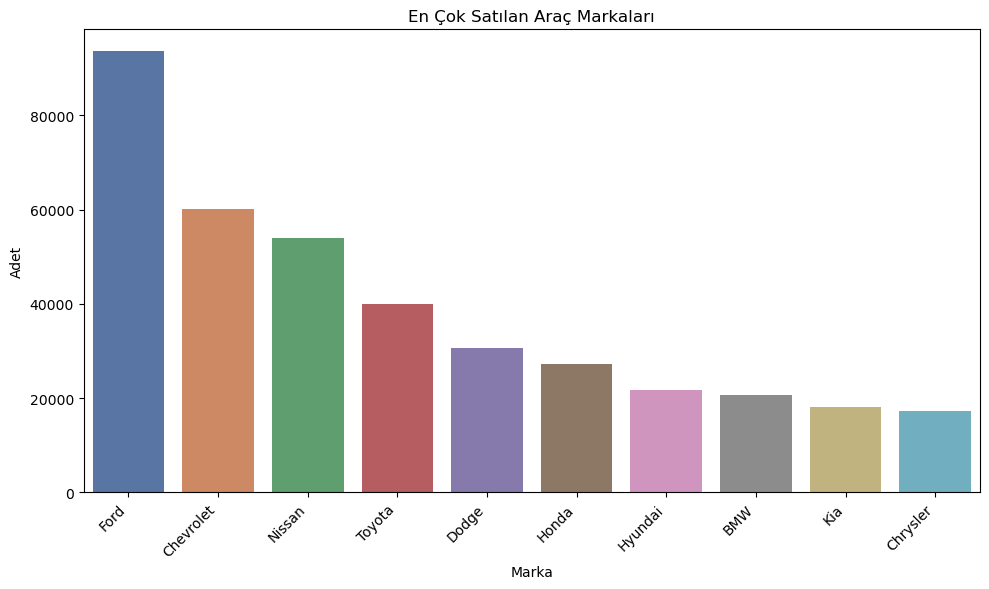

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=most.index, y=most.values, palette='deep')
plt.xlabel('Marka')
plt.ylabel('Adet')
plt.title('En Çok Satılan Araç Markaları')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [19]:
# En Çok Satılan Modeller
most_Sell = df.groupby(["make",'model'])["body"].count().nlargest(13).reset_index().drop_duplicates(['make'])
most_Sell

,make,model,body
0,Nissan,Altima,19349
1,Ford,F-150,14479
3,Toyota,Camry,12545
6,Honda,Accord,9127
7,BMW,3 Series,8204
8,Dodge,Grand Caravan,7941
9,Chevrolet,Impala,7923
12,Infiniti,G Sedan,7417


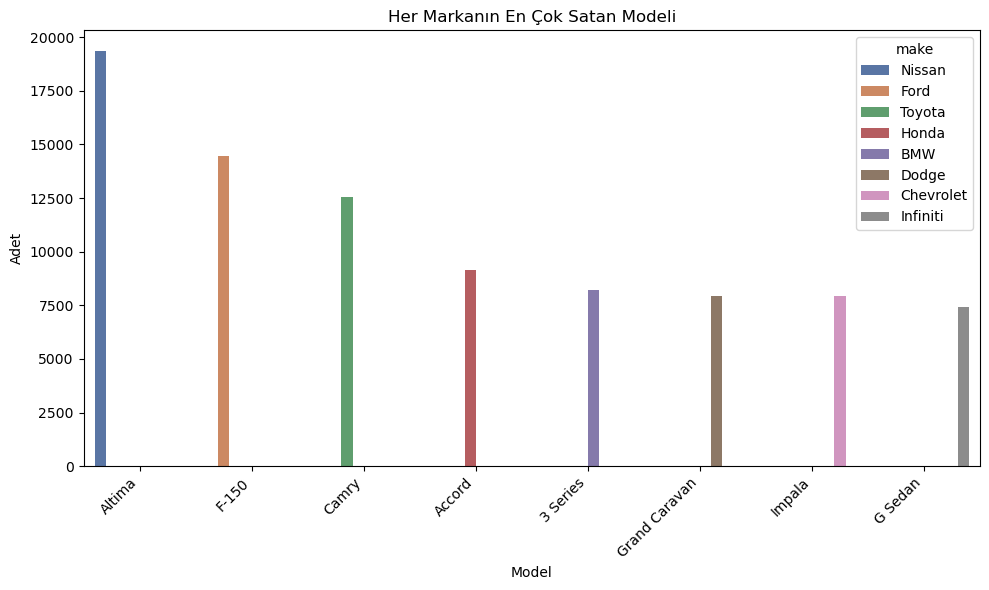

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='body', hue='make', data=most_Sell, palette='deep')
plt.xlabel('Model')
plt.ylabel('Adet')
plt.title('Her Markanın En Çok Satan Modeli')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



<div style="color:navy;">
    <h5>Basit Makine Öğrenmesi Uygulaması</h5>
</div>

In [21]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
numerical_columns

Index(['year', 'condition', 'odometer', 'mmr', 'sellingprice'], dtype='object')

In [22]:
df = df[numerical_columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   condition     558837 non-null  float64
 2   odometer      558837 non-null  float64
 3   mmr           558837 non-null  float64
 4   sellingprice  558837 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 21.3 MB


In [24]:
df.head()

,year,condition,odometer,mmr,sellingprice
0,2015,5.0,16639.0,20500.0,21500.0
1,2015,5.0,9393.0,20800.0,21500.0
2,2014,45.0,1331.0,31900.0,30000.0
3,2015,41.0,14282.0,27500.0,27750.0
4,2014,43.0,2641.0,66000.0,67000.0


In [25]:
df.isnull().sum()

year            0
condition       0
odometer        0
mmr             0
sellingprice    0
dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

y_train = df_train["sellingprice"]
X_train = df_train.drop("sellingprice", axis = 1)

y_test = df_test["sellingprice"]
X_test = df_test.drop("sellingprice", axis = 1)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

## Multiple - Lineer Regresyon

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [29]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model_LR.predict(X_test)
y_pred

array([12184.01390241,  6294.65260949,  7578.43280164, ...,
       14295.59701041, 27115.88470866,  8790.59404707])

In [31]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: {0}'.format(mse*(1/100000)))

Mean Squared Error: 27.214487074349307
